In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from random import randint


from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [3]:
df1 = pd.read_csv("archive/heart.csv")

df2 = pd.read_csv("archive/o2Saturation.csv")
df1
# df2

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df1["oldpeak"].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
colors = list(mcolors.CSS4_COLORS.keys())
colors

['aliceblue',
 'antiquewhite',
 'aqua',
 'aquamarine',
 'azure',
 'beige',
 'bisque',
 'black',
 'blanchedalmond',
 'blue',
 'blueviolet',
 'brown',
 'burlywood',
 'cadetblue',
 'chartreuse',
 'chocolate',
 'coral',
 'cornflowerblue',
 'cornsilk',
 'crimson',
 'cyan',
 'darkblue',
 'darkcyan',
 'darkgoldenrod',
 'darkgray',
 'darkgreen',
 'darkgrey',
 'darkkhaki',
 'darkmagenta',
 'darkolivegreen',
 'darkorange',
 'darkorchid',
 'darkred',
 'darksalmon',
 'darkseagreen',
 'darkslateblue',
 'darkslategray',
 'darkslategrey',
 'darkturquoise',
 'darkviolet',
 'deeppink',
 'deepskyblue',
 'dimgray',
 'dimgrey',
 'dodgerblue',
 'firebrick',
 'floralwhite',
 'forestgreen',
 'fuchsia',
 'gainsboro',
 'ghostwhite',
 'gold',
 'goldenrod',
 'gray',
 'green',
 'greenyellow',
 'grey',
 'honeydew',
 'hotpink',
 'indianred',
 'indigo',
 'ivory',
 'khaki',
 'lavender',
 'lavenderblush',
 'lawngreen',
 'lemonchiffon',
 'lightblue',
 'lightcoral',
 'lightcyan',
 'lightgoldenrodyellow',
 'lightgray',
 

In [9]:
def plot_histogram(variable):
    colors = list(mcolors.CSS4_COLORS.keys())
    plt.figure(figsize = (9,3))
    sns.histplot(df1[variable], kde = True, color = colors[randint(0, len(colors))])
    plt.xlabel(variable, color = "w", fontsize = 20)
    plt.ylabel("Frequency", color = "w", fontsize = 20)
    plt.title(f"{variable} | Distribution with Histogram", color = "w", fontsize = 20)
#     plt.savefig(variable+".png", format = "png")
    plt.show()

In [10]:
integers = (df1.dtypes == "int64")
integers_list = list(integers[integers].index)

print("Numerical variables:")
print(integers_list)

Numerical variables:
['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'slp', 'caa', 'thall', 'output']


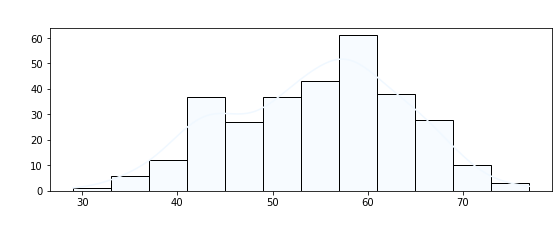

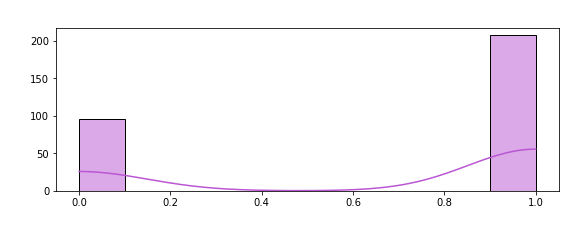

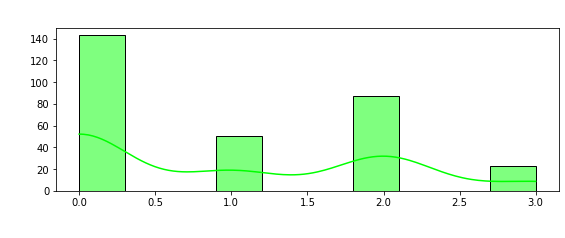

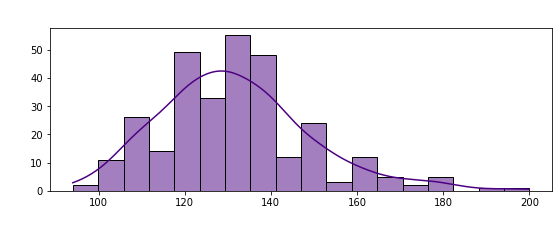

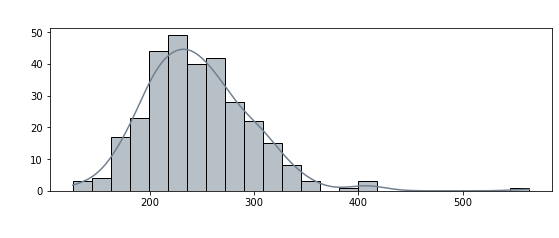

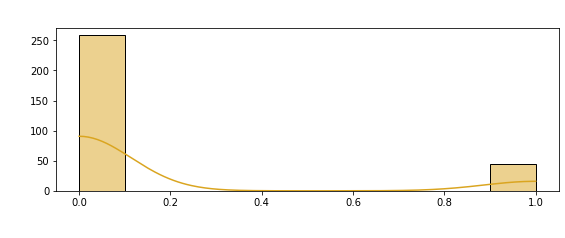

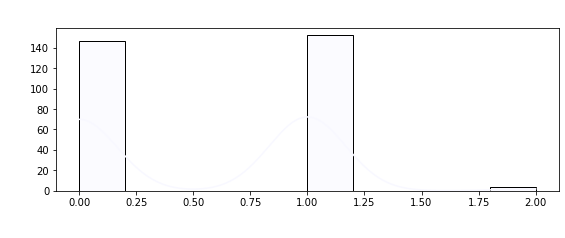

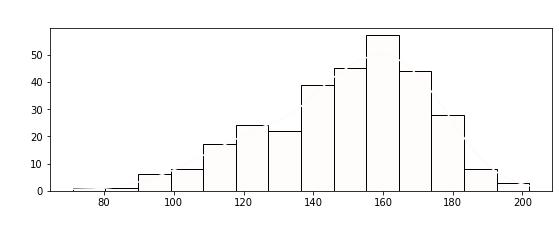

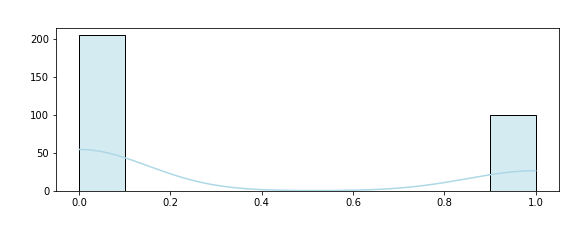

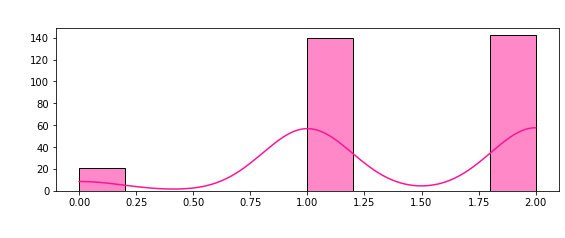

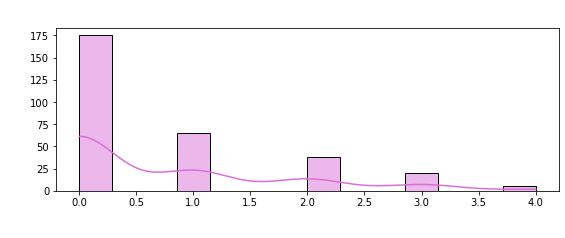

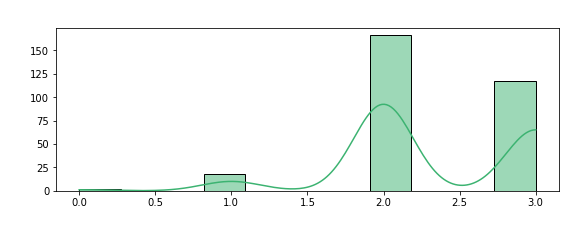

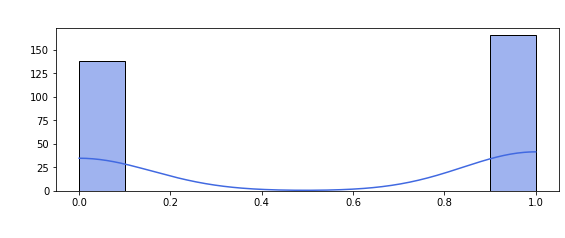

In [11]:
for n in integers_list:
    plot_histogram(n)

In [12]:
float_variables = (df1.dtypes == "float64")
float_variables_list = list(float_variables[float_variables].index)

print("Numerical variables:")
print(float_variables_list)

Numerical variables:
['oldpeak']


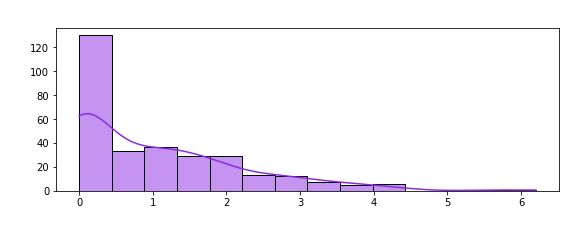

In [13]:
for n in float_variables_list:
    plot_histogram(n)

The heart_Attack dataset has 14 variables to be explored, including the output variable "output" (y), 8 of which are categorical variables and 7 are numeric. In addition, no outliers or incomplete data were found in the data set, so it is not necessary to seek to correct or eliminate any data. Finally, a relevant piece of information is that the database has 303 values ​​to be used to generate and validate the proposed future models.


In [14]:
df1.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


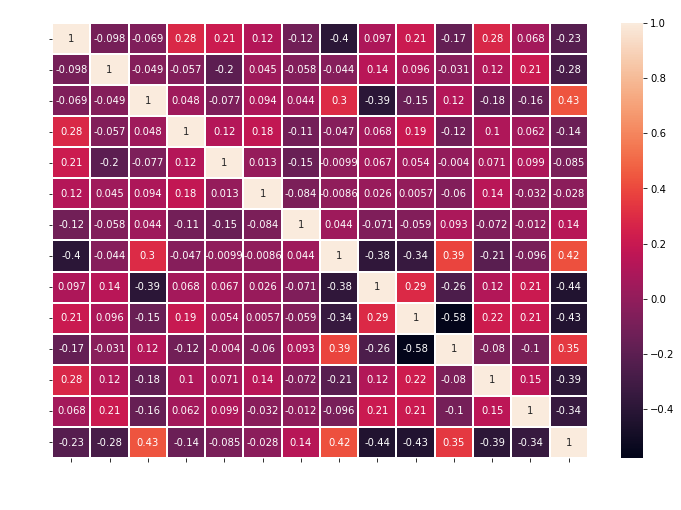

In [15]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df1.corr(),annot=True,linewidths = 2)
            
plt.title("Correlation Table", fontweight = "bold", color = "w")
plt.xticks(rotation=45, color = "w")
plt.yticks(rotation=45, color = "w")
plt.show()

In [16]:
# def plot_correlation(variable):
#     colors = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#               'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#               'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
    
#     plt.figure(figsize = (9,3))
#     sns.barplot(x = 'output', y = variable, data = df1, 
#                 palette=colors[randint(0, len(colors)-1)])
#     plt.xlabel("Chances of getting an heart attack", color = "w")
#     plt.ylabel(variable, color = "w")
#     plt.show()

In [17]:
# for variable in list(df1.columns)[0:-1]:
#     plot_correlation(variable)

In [18]:
# def plot_data_dispersion(variable):
#     colors = list(mcolors.CSS4_COLORS.keys())
#     plt.figure(figsize = (9,9))
#     sns.displot(df1[variable], kde = True, color = colors[randint(0, len(colors))])
#     plt.xlabel(variable, color = "w", fontsize = 20)
#     plt.ylabel("Frequency", color = "w", fontsize = 20)
#     plt.title(f"{variable} | Distribution with Histogram", color = "w", fontsize = 20)
# #     plt.savefig(variable+".png", format = "png")
#     plt.show()

In [19]:
# for variable in list(df1.columns)[0:-1]:
#     plot_data_dispersion(variable)

<AxesSubplot:title={'center':'Distribution of heart attack or not'}, ylabel='output'>

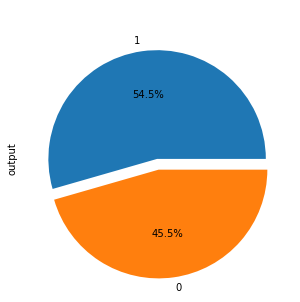

In [20]:
explode = [0, 0.1]
plt.figure(1, figsize=(5,5))
plt.title("Distribution of heart attack or not",
          fontfamily='serif',color = "w", fontweight = "bold" , )
df1['output'].value_counts().plot.pie(autopct="%1.1f%%", explode = explode)

Data Processing and Division

In [23]:
y = df1["output"]
df1.drop(labels=['output'], axis='columns', inplace=True)

In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [53]:
scaler = MinMaxScaler(feature_range = (0,1))
ct = make_column_transformer((OneHotEncoder(), ["sex", "cp","fbs", "restecg","exng","slp", "caa", "thall"]),remainder='passthrough')

transformed = ct.fit_transform(df1)
transformed_df = pd.DataFrame(transformed, columns=ct.get_feature_names_out())

X = scaler.fit_transform(transformed_df)
# X.shape
transformed_df

,onehotencoder__sex_0,onehotencoder__sex_1,onehotencoder__cp_0,onehotencoder__cp_1,onehotencoder__cp_2,onehotencoder__cp_3,onehotencoder__fbs_0,onehotencoder__fbs_1,onehotencoder__restecg_0,onehotencoder__restecg_1,...,onehotencoder__caa_4,onehotencoder__thall_0,onehotencoder__thall_1,onehotencoder__thall_2,onehotencoder__thall_3,remainder__age,remainder__trtbps,remainder__chol,remainder__thalachh,remainder__oldpeak
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,63.0,145.0,233.0,150.0,2.3
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,37.0,130.0,250.0,187.0,3.5
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,41.0,130.0,204.0,172.0,1.4
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,56.0,120.0,236.0,178.0,0.8
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,57.0,120.0,354.0,163.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,57.0,140.0,241.0,123.0,0.2
299,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,45.0,110.0,264.0,132.0,1.2
300,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,68.0,144.0,193.0,141.0,3.4
301,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,57.0,130.0,131.0,115.0,1.2


In [26]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=101) 
X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y_train_val, train_size=0.8, random_state=42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 303
Total # of sample in train dataset: 193
Total # of sample in validation dataset: 49
Total # of sample in test dataset: 61


In [58]:
list_i = [0.01, 0.1, 1, 10, 100]
list_j = [0.01, 0.1, 1, 10, 100]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

score = 0
best_score = 0
for i in list_i:
    for j in list_j:
        for k in kernels:
            model  = SVC(C=i, gamma=j, kernel = k)
            model.fit(X_train, y_train)
            score = model.score(X_valid, y_valid)
            if score > best_score:
                best_score = score
                best_para = {"C":i, "gamma" :j, "kernel": k}

print(best_para)


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


Training tests and analysis of model metrics


In [60]:
models = {
    "DecisionTreeCLassifier" : DecisionTreeClassifier(),
    "KNeighborClassifier": KNeighborsClassifier(n_neighbors=20),
    "SupportVectorClassifier": SVC(**best_para)
    
}
model_names = list(models.keys())

trainScores = []
validationScores = []
testScores = []
for m in models:
    model = models[m]
    print(X_train.shape, y_train.shape)
    
    model.fit(X_train, y_train)
    score = model.score(X_valid, y_valid)
  #print(f'{m} validation score => {score*100}')
    
    print(f'{m}') 
    train_score = model.score(X_train, y_train)
    print(f'Train score of trained model: {train_score*100}')
    trainScores.append(train_score*100)

    validation_score = model.score(X_valid, y_valid)
    print(f'Validation score of trained model: {validation_score*100}')
    validationScores.append(validation_score*100)

    test_score = model.score(X_test, y_test)
    print(f'Test score of trained model: {test_score*100}')
    testScores.append(test_score*100)
    print(" ")
    
    y_predictions = model.predict(X_test)
    conf_matrix = confusion_matrix(y_predictions, y_test)

    print(f'Confusion Matrix: \n{conf_matrix}\n')

#     predictions = model.predict(X_test)
#     cm = confusion_matrix(predictions, y_test)

    tn = conf_matrix[0,0]
    fp = conf_matrix[0,1]
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    accuracy  = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp)
    recall    = tp / (tp + fn)
    f1score  = 2 * precision * recall / (precision + recall)
    specificity = tn / (tn + fp)
    print(f'Accuracy : {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall   : {recall}')
    print(f'F1 score : {f1score}')
    print(f'Specificity : {specificity}')
    print("") 
    print(f'Classification Report: \n{classification_report(y_predictions, y_test)}\n')
    print("")
    model_names.remove(model_names[0])

#     preds = model.predict(X_test)
#     confusion_matr = confusion_matrix(y_test, y_predictions) #normalize = 'true'
    print("############################################################################")
    print("")
    print("")
    print("")

(193, 30) (193,)
DecisionTreeCLassifier
Train score of trained model: 100.0
Validation score of trained model: 59.183673469387756
Test score of trained model: 77.04918032786885
 
Confusion Matrix: 
[[20  3]
 [11 27]]

Accuracy : 0.7704918032786885
Precision: 0.9
Recall   : 0.7105263157894737
F1 score : 0.7941176470588235
Specificity : 0.8695652173913043

Classification Report: 
              precision    recall  f1-score   support

           0       0.65      0.87      0.74        23
           1       0.90      0.71      0.79        38

    accuracy                           0.77        61
   macro avg       0.77      0.79      0.77        61
weighted avg       0.80      0.77      0.77        61



############################################################################



(193, 30) (193,)
KNeighborClassifier
Train score of trained model: 88.08290155440415
Validation score of trained model: 79.59183673469387
Test score of trained model: 86.88524590163934
 
Confusion Matrix: 
[[24

In [34]:
model_names

[]

In [ ]:
listint = [1,1,2,3,4,5]
m = "p"
for m in range(1):
    print(m)

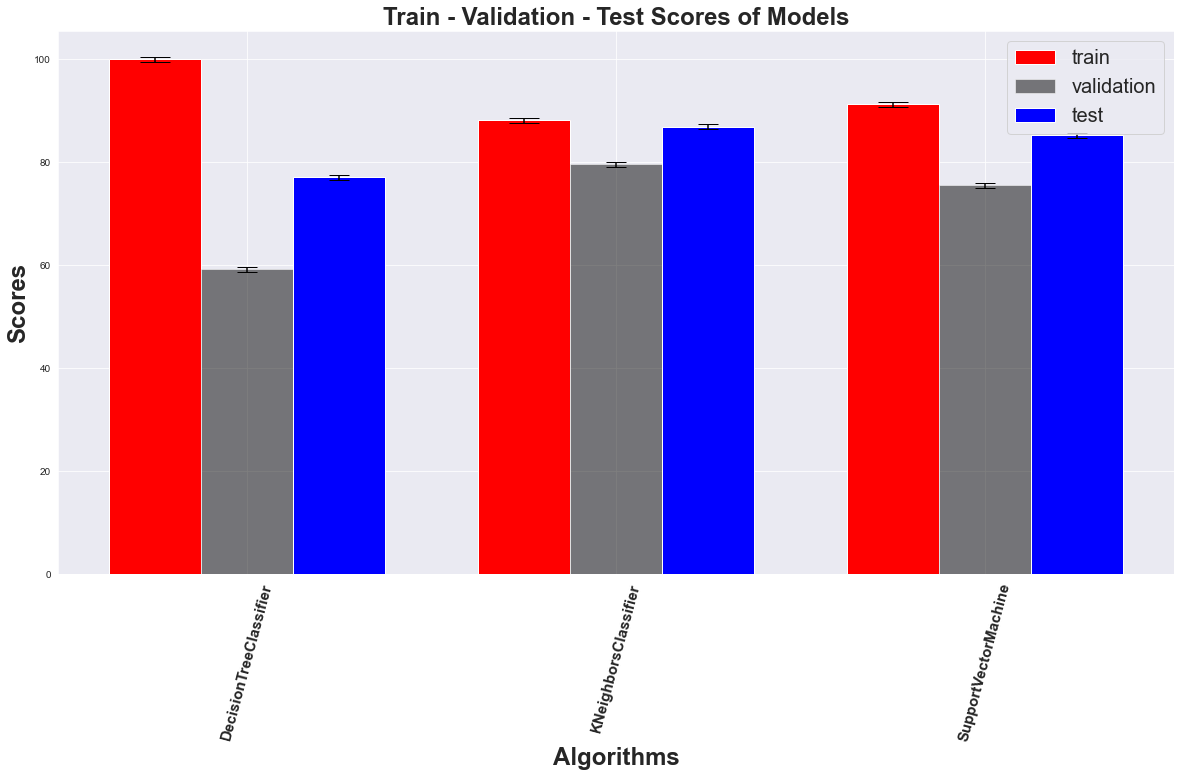

In [61]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.title('Train - Validation - Test Scores of Models', fontweight='bold', size = 24)

barWidth = 0.25
 
bars1 = trainScores
bars2 = validationScores
bars3 = testScores
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='train', yerr=0.5,ecolor="black",capsize=15)
plt.bar(r2, bars2, color='black', width=barWidth, edgecolor='white', label='validation', yerr=0.5,ecolor="black",capsize=10, alpha = 0.5)
plt.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label='test', yerr=0.5,ecolor="black",capsize=10)
 
modelNames = ['DecisionTreeClassifier','KNeighborsClassifier', 'SupportVectorMachine']
    
plt.xlabel('Algorithms', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 75, fontweight = "bold", fontsize = 15)
 
plt.legend(prop = {"size" :20})
plt.show()




In [40]:
r3

[0.5, 1.5, 2.5]

In [ ]:

# def autolabel(rects):
#     """
#     Attach a text label above each bar displaying its height
#     """
#     for rect in rects:
#         height = rect.get_height()
#         ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
#                 '%d' % int(height),
#                 ha='center', va='bottom')
        
        
# autolabel()

In [44]:
score = {}
train_score = {}
test_score = {}
for i in range(1,21):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    score[i] = round(model.score(X_valid, y_valid) ,2)
    train_score[i] = round(model.score(X_train, y_train), 2)
    test_score[i] = round(model.score(X_test, y_test),2)

# print(f"Validation Score = {score}")
# print(f"Training Score = {train_score}")
# print(f"Test Score = {test_score}")
KNscores = pd.DataFrame([score, train_score, test_score], index = ["Validation Score", "Training Score", "Testing Score"])
KNscores

# trainScores = []
# validationScores = []
# testScores = []
# for m in models:
#     model = models[m]
#     print(X_train.shape, y_train.shape)
    
#     model.fit(X_train, y_train)
#     score = model.score(X_valid, y_valid)
#   #print(f'{m} validation score => {score*100}')
    
#     print(f'{m}') 
#     train_score = model.score(X_train, y_train)
#     print(f'Train score of trained model: {train_score*100}')
#     trainScores.append(train_score*100)

#     validation_score = model.score(X_valid, y_valid)
#     print(f'Validation score of trained model: {validation_score*100}')
#     validationScores.append(validation_score*100)

#     test_score = model.score(X_test, y_test)
#     print(f'Test score of trained model: {test_score*100}')
#     testScores.append(test_score*100)
#     print(" ")
    
#     y_predictions = model.predict(X_test)
#     conf_matrix = confusion_matrix(y_predictions, y_test)

#     print(f'Confusion Matrix: \n{conf_matrix}\n')

#     predictions = model.predict(X_test)
#     cm = confusion_matrix(predictions, y_test)

#     tn = conf_matrix[0,0]
#     fp = conf_matrix[0,1]
#     tp = conf_matrix[1,1]
#     fn = conf_matrix[1,0]
#     accuracy  = (tp + tn) / (tp + fp + tn + fn)
#     precision = tp / (tp + fp)
#     recall    = tp / (tp + fn)
#     f1score  = 2 * precision * recall / (precision + recall)
#     specificity = tn / (tn + fp)
#     print(f'Accuracy : {accuracy}')
#     print(f'Precision: {precision}')
#     print(f'Recall   : {recall}')
#     print(f'F1 score : {f1score}')
#     print(f'Specificity : {specificity}')
#     print("") 
#     print(f'Classification Report: \n{classification_report(y_predictions, y_test)}\n')
#     print("")
#     model_names.remove(model_names[0])

# #     preds = model.predict(X_test)
# #     confusion_matr = confusion_matrix(y_test, y_predictions) #normalize = 'true'
#     print("############################################################################")
#     print("")
#     print("")
#     print("")

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Validation Score,0.55,0.65,0.67,0.65,0.69,0.71,0.73,0.73,0.73,0.71,0.69,0.73,0.78,0.76,0.78,0.76,0.78,0.80,0.76,0.80
Training Score,1.00,0.93,0.94,0.91,0.92,0.90,0.92,0.90,0.91,0.90,0.90,0.90,0.90,0.89,0.89,0.90,0.88,0.88,0.88,0.88
Testing Score,0.82,0.80,0.87,0.84,0.82,0.82,0.79,0.80,0.84,0.84,0.85,0.87,0.89,0.89,0.87,0.85,0.85,0.87,0.87,0.87


In [48]:
score = {}
train_score = {}
test_score = {}
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in kernels:
#     print(i)
    model = SVC(kernel= i)
    model.fit(X_train, y_train)
    score[i] = round(model.score(X_valid, y_valid) ,2)
    train_score[i] = round(model.score(X_train, y_train), 2)
    test_score[i] = round(model.score(X_test, y_test),2)
    
SVC_scores = pd.DataFrame([score, train_score, test_score], index = ["Validation Score", "Training Score", "Testing Score"])
SVC_scores

,linear,poly,rbf,sigmoid
Validation Score,0.73,0.65,0.69,0.73
Training Score,0.91,0.96,0.95,0.84
Testing Score,0.87,0.82,0.84,0.87


In [62]:
criterion = ["gini", "entropy"]
max_depth = range(1, 100)
score = 0
best_score = 0
for i in max_depth:
    for criteria in criterion:
        model  = DecisionTreeClassifier(criterion=criteria, max_depth=i)
        model.fit(X_train, y_train)
        score = model.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_param = {"criterion":criteria, "max_depth": i}
print(best_param)
 

{'criterion': 'gini', 'max_depth': 1}


In [66]:
for i in range(len(modelNames)):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i]}')

Accuracy of DecisionTreeClassifier -----> 77.04918032786885
Accuracy of KNeighborsClassifier -----> 86.88524590163934
Accuracy of SupportVectorMachine -----> 85.24590163934425


In [65]:
modelNames

['DecisionTreeClassifier', 'KNeighborsClassifier', 'SupportVectorMachine']